In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings; warnings.simplefilter('ignore')
from PIL import Image

In [ ]:
DATADIR = "/home/fw2ty/Documents/Studio/jupyter/Data/TestData"

folders = []
for folder in os.listdir(DATADIR):
    folders.append(folder)


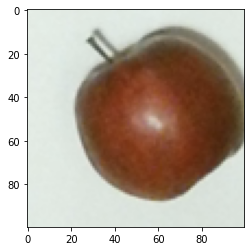

In [118]:
def img_load(path='Apple/AppleColor_1.txt', folder=DATADIR, width=1920, height=1080):
    
    im_file = os.path.join(folder, path)
    data = pd.read_csv(im_file, sep=" ", header=None)

    r = int(len(data)/3)
    g = int(2*len(data)/3)
    b = len(data)

    image = data.values.flatten()

    R = image[0:r]
    G = image[r:g]
    B = image[g:b]

    R = R.reshape(width, height)
    G = G.reshape(width, height)
    B = B.reshape(width, height)

    RGB = np.stack([R,G,B], axis=2)

    return RGB


def img_plot(RGB):
    plt.figure(figsize=(20, 20))    
    plt.imshow(RGB)
    plt.show()


def img_crop(RGB, show=False):
    img = Image.fromarray(RGB.astype('uint8'), 'RGB')
    img = img.crop((475, 900, 625, 1050)) 
  
    IMG_SIZE = 100
    img = np.asarray(img)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    
    if show:
        plt.imshow(img)
        plt.show()
    
    return img

img = img_load('Apple/AppleColor_3.txt')
# img_plot(i)
img = img_crop(img, show=True)

In [2]:
import os

import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.load_model('/home/fw2ty/Documents/Studio/jupyter/model.hdf')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 100)       7600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        160064    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              30977000  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [119]:
classes2 = ['Apple', 'Banana','Grape','Kiwi', 'Orange' ]
probabilities = model.predict(np.array( [i,] ))
print(probabilities)
print("Most likely class:", classes2[probabilities.argmax()])

[[0. 1. 0. 0. 0.]]
Most likely class: Banana
